In [ ]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [ ]:
dr = pd.read_csv('amazon_reviews_1.csv')
print("Data import successful")

dr.info() # checking null values

Data import successful
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         10000 non-null  int64 
 1   marketplace        10000 non-null  object
 2   customer_id        10000 non-null  int64 
 3   review_id          10000 non-null  object
 4   product_id         10000 non-null  object
 5   product_parent     10000 non-null  int64 
 6   product_title      10000 non-null  object
 7   product_category   10000 non-null  object
 8   star_rating        10000 non-null  int64 
 9   helpful_votes      10000 non-null  int64 
 10  total_votes        10000 non-null  int64 
 11  vine               10000 non-null  object
 12  verified_purchase  10000 non-null  object
 13  review_date        10000 non-null  object
 14  review             9999 non-null   object
 15  review_category    10000 non-null  int64 
dtypes: int64(7), objec

In [ ]:
dr.isna().sum() # Review containing null values.

Unnamed: 0           0
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_date          0
review               1
review_category      0
dtype: int64

In [ ]:
dr1 = dr.dropna() #drop either row or columns with missing data
dr1

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0
3,38798,UK,4329864,R1WK44Y81XH276,B00NWLIW0E,13526192,Goat Simulator,Mobile_Apps,1,3,5,N,N,2014-12-26,"Rubbish game When I tried to open it, it said ...",0
4,43364,UK,8080547,R2UL591NPU40SN,B00HRC40T6,887316735,Shadow Blade,Mobile_Apps,1,0,0,N,Y,2015-06-29,One Star Come on,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28832,UK,3958125,RUEJKMMT07CSA,B00DJFIMW6,271429756,Minion Rush: Despicable Me Official Game,Mobile_Apps,5,0,0,N,Y,2015-07-12, It's great😆,1
9996,18960,UK,21426274,R81EWRNK3IF2Y,0099579936,600633062,Fifty Shades of Grey: Book One of the Fifty Sh...,Books,1,0,0,N,Y,2015-05-07,Urrgh This really is appalling. Somewhere on ...,0
9997,90892,UK,9430154,REJ2WD11F46SB,B00DQVSTCG,186107214,Mdna World Tour [Blu-ray] [2013] [Region Free],Video DVD,2,0,1,N,Y,2013-09-13,"Quite disappointed After waiting over a year, ...",0
9998,35244,UK,4652123,R1LBP8Z9FOQRDQ,B00DJFIMW6,271429756,Minion Rush: Despicable Me Official Game,Mobile_Apps,5,7,9,N,Y,2013-12-29,Rate Despicable minion rush is cool<br />So co...,1


In [ ]:
dr1.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
0,35311,UK,4652511,R2PF9XCB2AOY7C,B00MNYTWMI,174964168,Midnight Castle – A Free Hidden Object Mystery...,Mobile_Apps,5,0,1,N,Y,2014-09-16,"Addictive game Very good game, the graphics ar...",1
1,44590,UK,8778070,R2OVRHVTCC7U18,B00I8Q77Y0,370420344,Flappy Wings (not Flappy Bird),Mobile_Apps,2,1,2,N,Y,2014-02-16,Where to start? I came on here because I wante...,0
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0
3,38798,UK,4329864,R1WK44Y81XH276,B00NWLIW0E,13526192,Goat Simulator,Mobile_Apps,1,3,5,N,N,2014-12-26,"Rubbish game When I tried to open it, it said ...",0
4,43364,UK,8080547,R2UL591NPU40SN,B00HRC40T6,887316735,Shadow Blade,Mobile_Apps,1,0,0,N,Y,2015-06-29,One Star Come on,0


In [ ]:
dr1.keys()

Index(['Unnamed: 0', 'marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_date', 'review', 'review_category'],
      dtype='object')

In [ ]:
dr1.tail()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
9995,28832,UK,3958125,RUEJKMMT07CSA,B00DJFIMW6,271429756,Minion Rush: Despicable Me Official Game,Mobile_Apps,5,0,0,N,Y,2015-07-12, It's great😆,1
9996,18960,UK,21426274,R81EWRNK3IF2Y,0099579936,600633062,Fifty Shades of Grey: Book One of the Fifty Sh...,Books,1,0,0,N,Y,2015-05-07,Urrgh This really is appalling. Somewhere on ...,0
9997,90892,UK,9430154,REJ2WD11F46SB,B00DQVSTCG,186107214,Mdna World Tour [Blu-ray] [2013] [Region Free],Video DVD,2,0,1,N,Y,2013-09-13,"Quite disappointed After waiting over a year, ...",0
9998,35244,UK,4652123,R1LBP8Z9FOQRDQ,B00DJFIMW6,271429756,Minion Rush: Despicable Me Official Game,Mobile_Apps,5,7,9,N,Y,2013-12-29,Rate Despicable minion rush is cool<br />So co...,1
9999,9691,UK,7871164,R23010V0DJDG2Q,1405910259,758174477,Reflected in You,Books,5,0,0,N,Y,2014-11-20,Five Stars Great story,1


In [ ]:
dr1['review']

0       Addictive game Very good game, the graphics ar...
1       Where to start? I came on here because I wante...
2       Really Disappointed in this Film I have to say...
3       Rubbish game When I tried to open it, it said ...
4                                        One Star Come on
                              ...                        
9995                                    It's great😆
9996    Urrgh This really is appalling.  Somewhere on ...
9997    Quite disappointed After waiting over a year, ...
9998    Rate Despicable minion rush is cool<br />So co...
9999                               Five Stars Great story
Name: review, Length: 9999, dtype: object

In [ ]:
# VISUALIZING THE DATA

positive = dr1[dr1['verified_purchase']=='Y']
negative = dr1[dr1['verified_purchase']=='N']

In [ ]:
negative

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date,review,review_category
2,90295,UK,8476187,RRPSNSVU2RNE4,B008PEHK6U,173475712,Man of Steel [DVD],Video DVD,3,1,5,N,N,2013-12-28,Really Disappointed in this Film I have to say...,0
3,38798,UK,4329864,R1WK44Y81XH276,B00NWLIW0E,13526192,Goat Simulator,Mobile_Apps,1,3,5,N,N,2014-12-26,"Rubbish game When I tried to open it, it said ...",0
10,94032,UK,17605857,RPV0PQKID71J0,B0014E9174,846396403,Cloverfield [DVD],Video DVD,1,14,41,N,N,2008-03-14,Hand-held shakey camera rubbish A big monster ...,0
17,66823,UK,19497591,RNU6D21CNOIVU,B002GZQYMK,849389845,The Resistance,Music,1,2,10,N,N,2011-12-23,"A disappointingly flat album, that doesn't tak...",0
24,52257,UK,3605293,R2XLU5IMY44WR6,B0026JWDQW,4848225,Sunny Side Up,Music,4,0,0,N,N,2014-08-16,Four Stars Excellent,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9975,90153,UK,8203815,R23GUDRQV2QD05,B0001EYT2A,393238365,"The Good, The Bad and The Ugly - 2 Disc Specia...",Video DVD,2,3,12,N,N,2013-07-22,Not Good.Just Bad and Ugly.Easily the worst in...,0
9976,16498,UK,18717970,R1EW4HGCV83ES6,1444723472,626565549,The Dark Tower IV: Wizard and Glass: (Volume 4),Books,3,0,0,N,N,2015-01-13,I was disappointed that the front cover was da...,0
9978,64845,UK,13852865,RB83OXWNNUL44,B005R5U5B2,403237765,Up All Night,Music,2,1,6,N,N,2012-02-28,Downhill Slope Of what Ive heard of One Direct...,0
9981,16551,UK,18798533,R3861JQSUJ9KJK,071815780X,898243667,Jamie's 15-Minute Meals,Books,3,1,1,N,N,2014-07-04,Ok book........ I watched a few of the 15 minu...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


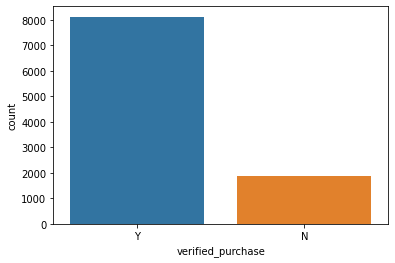

In [ ]:
sns.countplot(dr1['verified_purchase'], label = "Count")

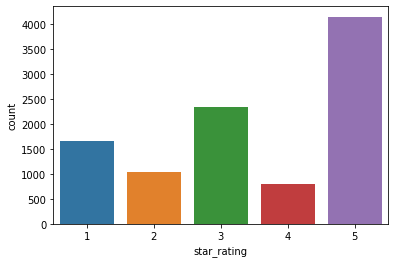

In [ ]:
sns.countplot(x = 'star_rating', data = dr1)

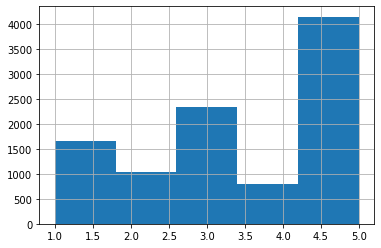

In [ ]:
dr1['star_rating'].hist(bins = 5)

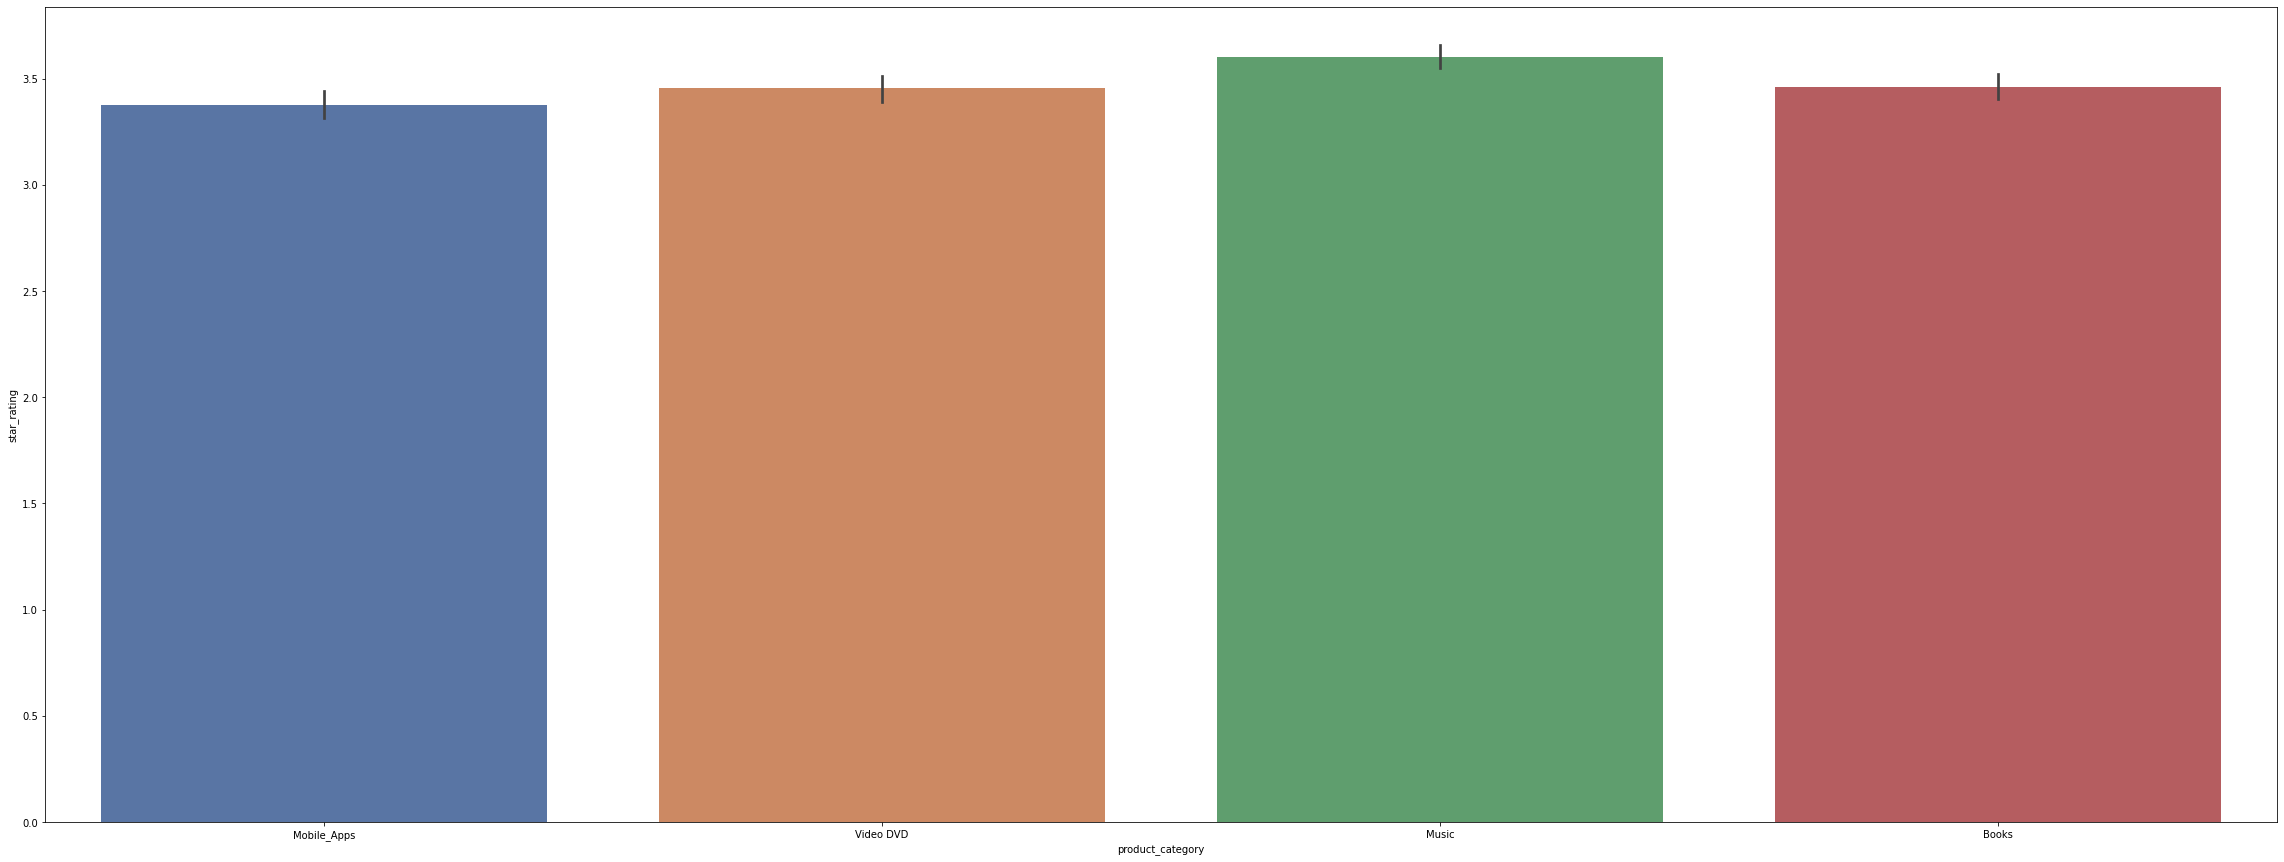

In [ ]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'product_category', y='star_rating', data=dr1, palette = 'deep')

In [ ]:
# Word count
words = dr1['review'].tolist()

In [ ]:
len(words)

9999

###Taking Useful Data from Dataset

In [ ]:
dr1[['review', 'review_category']]

,review,review_category
0,"Addictive game Very good game, the graphics ar...",1
1,Where to start? I came on here because I wante...,0
2,Really Disappointed in this Film I have to say...,0
3,"Rubbish game When I tried to open it, it said ...",0
4,One Star Come on,0
...,...,...
9995, It's great😆,1
9996,Urrgh This really is appalling. Somewhere on ...,0
9997,"Quite disappointed After waiting over a year, ...",0
9998,Rate Despicable minion rush is cool<br />So co...,1


In [ ]:
# Adding column names to the dataframe
#data = dr1[['review', 'review_category']]
dr1.rename(columns = {'review':'Review','review_category':'Sentiment'} , inplace = True)
#columnName = ['Review','Sentiment']
#dr1.columns = columnName
dr2 = dr1[['Review','Sentiment']]
dr2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Review,Sentiment
0,"Addictive game Very good game, the graphics ar...",1
1,Where to start? I came on here because I wante...,0
2,Really Disappointed in this Film I have to say...,0
3,"Rubbish game When I tried to open it, it said ...",0
4,One Star Come on,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


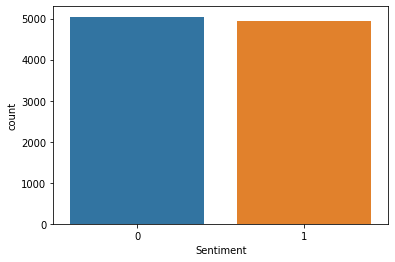

In [ ]:
sns.countplot(dr2['Sentiment'], label = "Count")